# Binary Classifiers
In machine learning, binary classification is a supervised learning algorithm that categorizes new observations into one of two classes

The following are a few binary classification applications, where the 0 and 1 columns are two possible classes for each observation: 

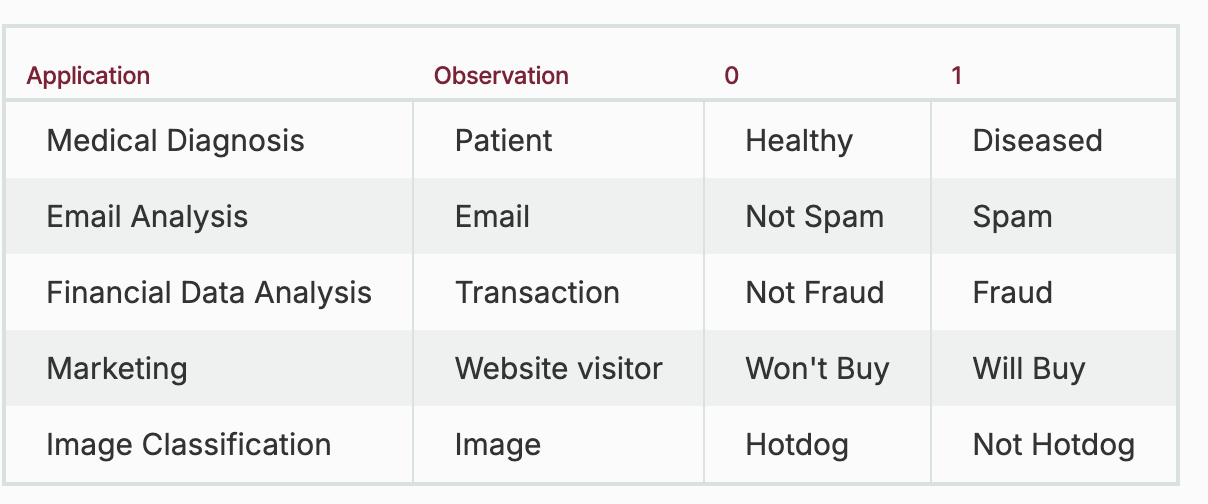

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
dataset = load_breast_cancer(as_frame=True)


In [46]:
#what the table looks like for the first 5 rows
dataset['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
dataset['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [48]:
dataset['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

### <b>Step 1</b> : Define explanatory and target variables
- x: stores the rows of observations 
- y: the corresponding class of those observations 

In [ ]:
x = dataset['data']
y = dataset['target']

### <b>Step 2</b> : Split the dataset into training and testing sets
- <code>test_size=0.25</code>: Specifies that 25% of the data will be used for testing, and the remaining 75% for training.
- <code>random_state=0</code>: Ensures reproducibility by fixing the random seed. This way, the same split occurs every time the code is run.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### <b>Step 3</b>: Normalize the data for numerical stability
- apply any data transformations to training and testing data separately to prevent data leakage.

In [50]:
ss_train = StandardScaler()
x_train = ss_train.fit_transform(x_train)

ss_test = StandardScaler()
x_test = ss_test.fit_transform(x_test)


### <b>Step 4</b>: Fit a logistic regression model to the training data

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

### <b>Step 5</b>: Make predictions on the testing data
- With the model trained, we now ask the model to predict targets based on the test data.

In [ ]:
predictions = model.predict(x_test)

#metrics 
accuracy = accuracy_score(predictions,y_test) #module-defined accuracy calculator
precision = precision_score(predictions,y_test)
recall = recall_score(predictions,y_test)

In [52]:
print("Accuracy: " + str(accuracy) + "\n"
      "Precision: " + str(precision) + "\n"
      "Recall: " + str(recall) + "\n"
      )

Accuracy: 0.958041958041958
Precision: 0.9555555555555556
Recall: 0.9772727272727273



### Result parameter 
We can evaluate a binary classifier based on the following parameters:

- <b>True Positive (TP)</b>: The patient is diseased and the model predicts "diseased"
- <b>False Positive (FP)</b>: The patient is healthy but the model predicts "diseased"
- <b>True Negative (TN)</b>: The patient is healthy and the model predicts "healthy"
- <b>False Negative (FN)</b>: The patient is diseased and the model predicts "healthy"

After obtaining these values, we can compute the accuracy score of the binary classifier as follows:

$$accuracy = \frac{TP + TN}{TP+FP+TN+FN}$$

The following is a confusion matrix, which represents the above parameters:

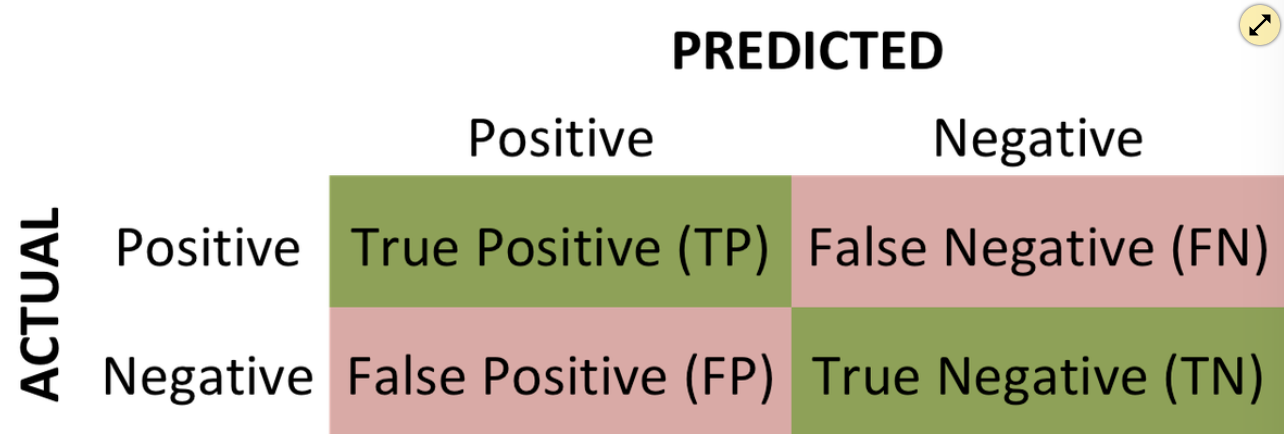

In machine learning, many methods utilize binary classification. The most common are:
- Support Vector Machines
- Naive Bayes
- Nearest Neighbor
- Decision Trees
- Logistic Regression
- Neural Networks

### <b>Step 6</b>: Calculate the accuracy score by comparing the actual values and predicted values.
-  calculate how well the model performed by comparing the model's predictions to the true target values (the y_test variable)

In [53]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test,predictions)

tn, fp, fn, tp = cm.ravel()

print('True Positive(TP)  = ', tp)
print('False Positive(FP) = ', fp)
print('True Negative(TN)  = ', tn)
print('False Negative(FN) = ', fn)

accuracy =  (tp + tn) / (tp + fp + tn + fn)

print('Accuracy of the binary classifier = {:f}'.format(accuracy))

True Positive(TP)  =  86
False Positive(FP) =  2
True Negative(TN)  =  51
False Negative(FN) =  4
Accuracy of the binary classifier = 0.958042
